In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as sp
from scipy.stats import norm
from scipy.stats import skew
from numpy.random import seed
import warnings
warnings.filterwarnings('ignore')

# 1. train/test data load

In [2]:
train=pd.read_csv('train.csv')
train.shape

(1460, 81)

In [3]:
test = pd.read_csv("test.csv")
test.shape

(1459, 80)

# 2. Train Data 구조 살펴보기

In [4]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [8]:
#missing_data_test.iloc[0:40,0:1]

In [9]:
train = train.drop((missing_data_train[missing_data_train['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() 

0

In [10]:
test = test.drop((missing_data_train[missing_data_train['Total'] > 1]).index,1)
test.isnull().sum().max() 

4

In [11]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test2.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685


In [12]:
train=train.drop(["Id"], axis=1)
test=test.drop(["Id"], axis=1)

In [13]:
train.shape

(1459, 62)

In [14]:
test.shape

(1459, 61)

In [15]:
test.fillna(test.mean(),inplace=True)

In [16]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test3 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test3.head(10)

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
KitchenQual,1,0.000685
Exterior1st,1,0.000685
SaleType,1,0.000685
Exterior2nd,1,0.000685
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
RoofStyle,0,0.000000


In [17]:
train=train.drop(["MSZoning","Functional","Utilities", "KitchenQual","Exterior1st", "SaleType", "Exterior2nd"  ], axis=1)
test=test.drop(["MSZoning","Functional","Utilities", "KitchenQual","Exterior1st", "SaleType", "Exterior2nd"  ], axis=1)

In [18]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test4 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test4.head(2)

,Total,Percent
SaleCondition,0,0.0
OverallCond,0,0.0


# target value 살펴보기
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

In [19]:
train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

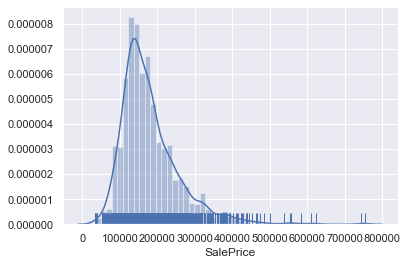

In [20]:
sns.distplot(train['SalePrice'], rug=True);
plt.show()

- Sahpio test, 정규성 검정(But 표본이 30개를 넘으므로, 독립표본 T 검정을 다시 수행)
- : P-value가 0.05보다 작으므로 정규성 X

In [21]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881943
Kurtosis: 6.529263


In [22]:
original_SalePrice = train['SalePrice']
train['SalePrice'] = np.log1p(train['SalePrice'])

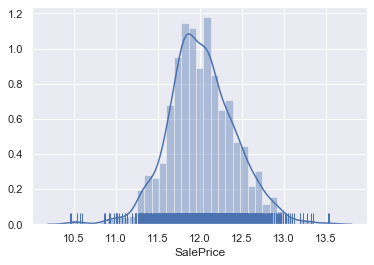

In [23]:
sns.distplot(train['SalePrice'], rug=True);
plt.show()

- Outliers가 꽤 있음

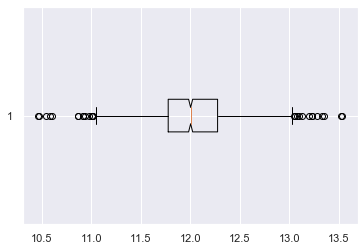

In [24]:
plt.boxplot(train['SalePrice'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

In [25]:
train['SalePrice'].describe()

count    1459.000000
mean       12.024054
std         0.399586
min        10.460271
25%        11.774913
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [26]:
cond1 = train['SalePrice'] > 13
outlier_index = train[cond1].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)
 
train.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [ 178  185  440  527  591  691  769  798  803  898 1046 1169 1182 1243
 1373]
아웃라이어 삭제 전 : (1459, 55)
아웃라이어 삭제 후 : (1444, 55)


In [27]:
cond1 = train['SalePrice'] < 11.0271585
outlier_index = train[cond1].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)

train.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [  30  375  410  495  533  636  705  710  812  916  968 1100 1325 1337
 1380]
아웃라이어 삭제 전 : (1444, 55)
아웃라이어 삭제 후 : (1429, 55)


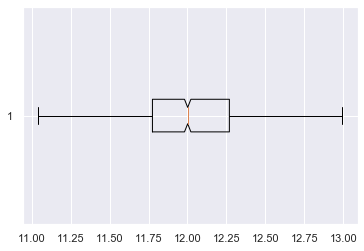

In [28]:
plt.boxplot(train['SalePrice'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

# skewness 확인 및 열 drop

In [29]:
features_index = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          25.224522
PoolArea         15.905445
LotArea          12.424014
3SsnPorch        10.180911
LowQualFinSF      9.092022
KitchenAbvGr      4.468915
BsmtFinSF2        4.226498
ScreenPorch       4.130387
BsmtHalfBath      4.079738
EnclosedPorch     3.080073
OpenPorchSF       2.261681
BsmtFinSF1        1.704607
TotalBsmtSF       1.569394
WoodDeckSF        1.544347
1stFlrSF          1.411044
MSSubClass        1.388339
GrLivArea         1.238304
dtype: float64


In [30]:
train[skew_features_top.index] = np.log1p(train[skew_features_top.index])
test[skew_features_top.index] = np.log1p(test[skew_features_top.index])

In [31]:
features_index = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         15.348136
3SsnPorch         7.640431
LowQualFinSF      7.523583
MiscVal           5.192206
BsmtHalfBath      3.908464
KitchenAbvGr      3.844346
ScreenPorch       3.174707
BsmtFinSF2        2.493773
EnclosedPorch     2.107497
dtype: float64


In [32]:
skew_features_top.index

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [33]:
train=train.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal'], axis=1)
test=test.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
 'PoolArea', 'MiscVal'], axis=1)

In [34]:
train.shape

(1429, 46)

In [35]:
test.shape

(1459, 45)

# GrLivArea outliers 제거

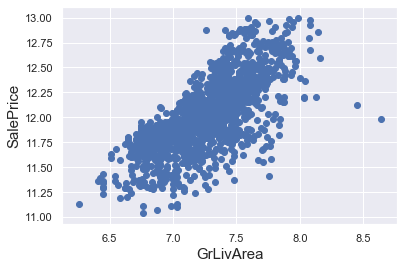

In [36]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [37]:
train['GrLivArea'].describe()

count    1429.000000
mean        7.267496
std         0.319865
min         6.255750
25%         7.034388
50%         7.289611
75%         7.478170
max         8.638171
Name: GrLivArea, dtype: float64

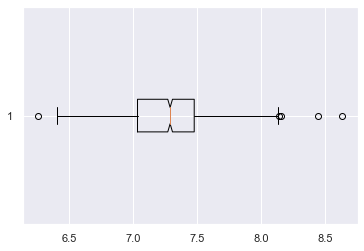

In [38]:
plt.boxplot(train['GrLivArea'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

In [39]:
cond1 = train['GrLivArea'] > 8.143843
outlier_index = train[cond1].index
print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)
train.drop(outlier_index, axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [ 304  523 1268 1298]
아웃라이어 삭제 전 : (1429, 46)
아웃라이어 삭제 후 : (1425, 46)


In [40]:
cond1 = train['GrLivArea'] < 6.3
outlier_index = train[cond1].index
print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 :', train.shape)
train.drop(outlier_index, axis=0, inplace=True)
print('아웃라이어 삭제 후 :', train.shape)

아웃라이어 레코드 index : [29]
아웃라이어 삭제 전 : (1425, 46)
아웃라이어 삭제 후 : (1424, 46)


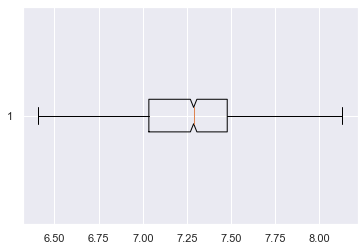

In [41]:
plt.boxplot(train['GrLivArea'],
    vert=False, 
    notch=True, 
    whis=1.5)
plt.show()

# 피어슨 상관계수 

In [42]:
column_cont=[]
temp=[]
for i in range(0,46):
    xxx=train.columns[i]
    if train[xxx].dtypes!=object:
        temp=xxx
        column_cont.append(temp)   

In [43]:
corr_abs=abs(train[column_cont].corr())

In [44]:
de_feature=[]
for i in range(0,25):
    for n in range(1,25-i):
        k=n+i
        if corr_abs.iloc[i,k]>=0.7:
            temp=corr_abs.columns[n]
            de_feature.append(temp)

In [45]:
de_feature

['MoSold', 'YearRemodAdd', 'FullBath', 'LotArea']

In [46]:
train=train.drop(['MoSold', 'YearRemodAdd', 'FullBath', 'LotArea'], axis=1)
test=test.drop(['MoSold', 'YearRemodAdd', 'FullBath', 'LotArea'], axis=1)

# one hot encoder

In [47]:
all_data = pd.concat((train, test))

In [48]:
all_data.shape

(2883, 42)

In [49]:
train.shape

(1424, 42)

In [50]:
test.shape

(1459, 41)

In [51]:
all_data2=pd.get_dummies(all_data)

In [52]:
train2=all_data2.iloc[:1424,:]

In [53]:
test2=all_data2.iloc[1424:,:]

In [54]:
train2.shape

(1424, 149)

In [55]:
test2=test2.drop(['SalePrice'], axis=1)

In [56]:
test2.shape

(1459, 148)

In [57]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
y_target =  train2['SalePrice']
X_features = train2.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [60]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.111
Ridge 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 RMSE: 0.227


[0.11114151915540475, 0.11062167368135477, 0.22717477517017476]

In [61]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [62]:
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.108 0.123 0.134 0.103 0.112]
LinearRegression CV 평균 RMSE 값: 0.116

Ridge CV RMSE 값 리스트: [0.105 0.121 0.131 0.102 0.11 ]
Ridge CV 평균 RMSE 값: 0.114

Lasso CV RMSE 값 리스트: [0.223 0.248 0.244 0.233 0.239]
Lasso CV 평균 RMSE 값: 0.237


In [63]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_


In [64]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1129, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1136, 최적 alpha:{'alpha': 0.001}


In [65]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [66]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

LinearRegression 로그 변환된 RMSE: 0.111
Ridge 로그 변환된 RMSE: 0.112
Lasso 로그 변환된 RMSE: 0.112


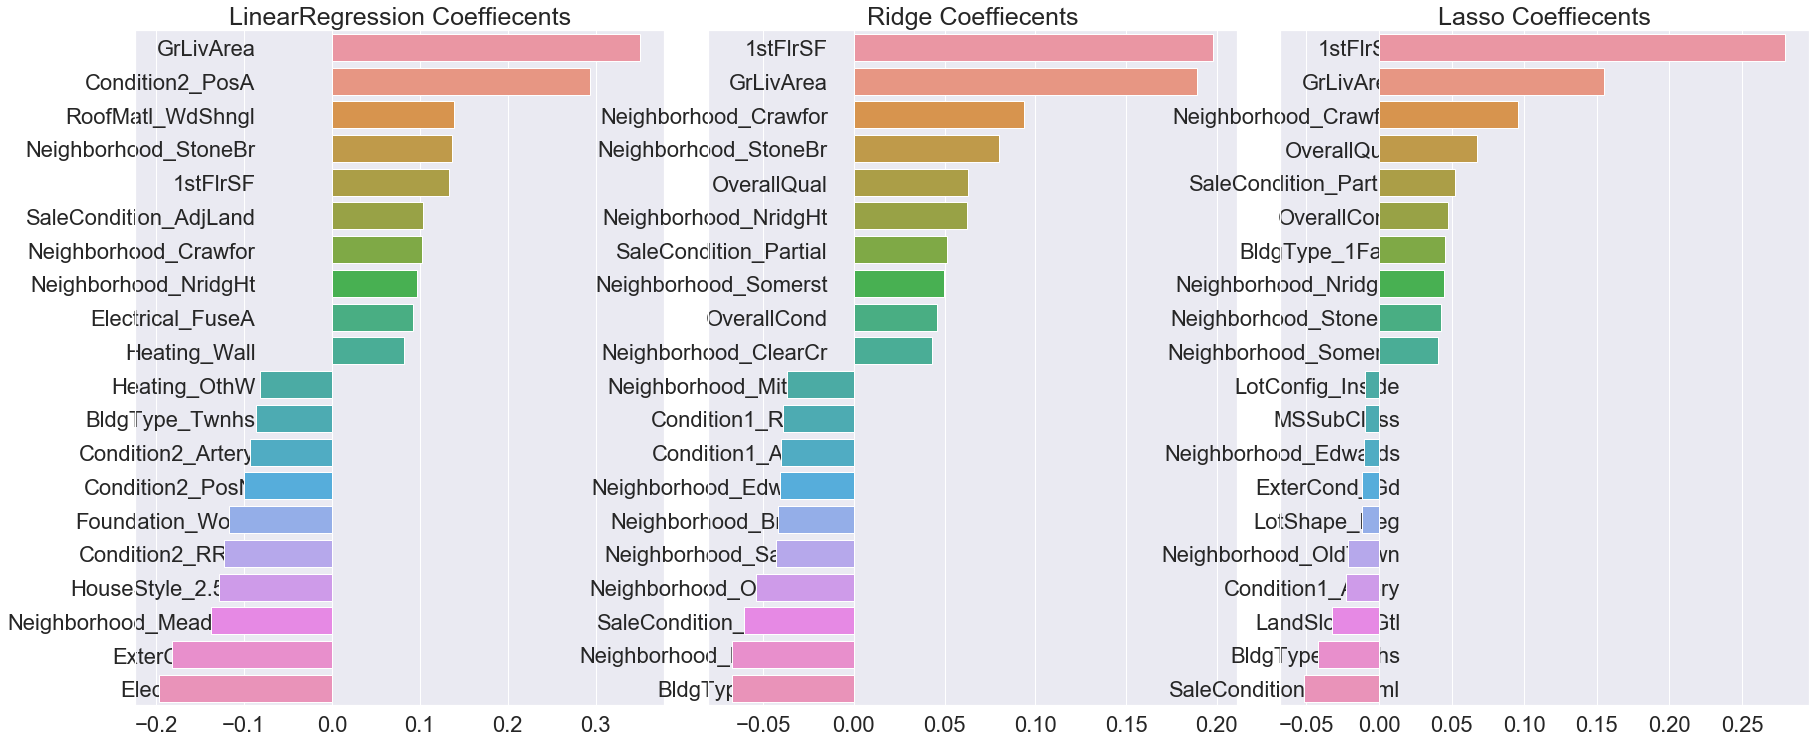

In [67]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

# 회귀

In [111]:
y_train2 =  train2['SalePrice']
X_train2 = train2.drop('SalePrice',axis=1, inplace=False)

In [112]:
X_test=test2

In [113]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

In [114]:
lr_reg = LinearRegression()
lr_reg.fit(X_train2, y_train2)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train2, y_train2)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train2, y_train2)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
lr_reg_pred = lr_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

In [116]:
pred = 0.4*lr_reg_pred+0.3 * ridge_pred + 0.3 * lasso_pred

In [117]:
back = np.expm1(pred)

In [118]:
back

array([116588.75762866, 156090.20610295, 173041.07688857, ...,
       157750.40202047, 121219.53400755, 233019.60281633])

In [119]:
submission = pd.read_csv("sample_submission.csv")
submission

submission["SalePrice"] = back

print(submission.shape)
submission.head()

(1459, 2)


,Id,SalePrice
0,1461,116588.757629
1,1462,156090.206103
2,1463,173041.076889
3,1464,194417.446779
4,1465,196177.099256


In [120]:
submission.to_csv("submission1.csv", index=False)

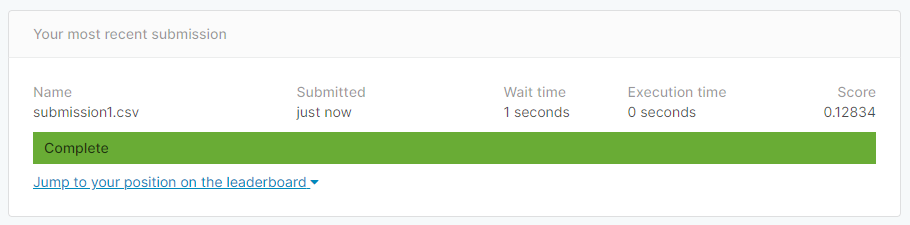

In [121]:
from IPython.display import Image
 
Image("1st submission.png")

[Text(0.5, 1.0, 'test')]

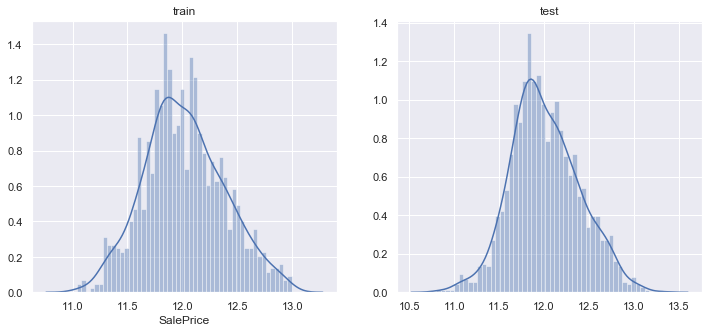

In [122]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(pred,ax=ax2,bins=50)
ax2.set(title="test")

# RF

In [123]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [124]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=8,
                              random_state=42)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [125]:
%time score = cross_val_score(model, X_train2, y_train2, cv=k_fold, scoring='neg_mean_squared_error')
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 5.63 s
Score= -0.01704


In [126]:
model.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [127]:
RF_predictions = model.predict(X_test)
print(RF_predictions.shape)
RF_predictions[0:10]

(1459,)


array([11.73843447, 11.93251583, 12.07551931, 12.10580133, 12.21631252,
       12.12945459, 12.04675671, 12.07285117, 12.11002948, 11.68666491])

[Text(0.5, 1.0, 'test')]

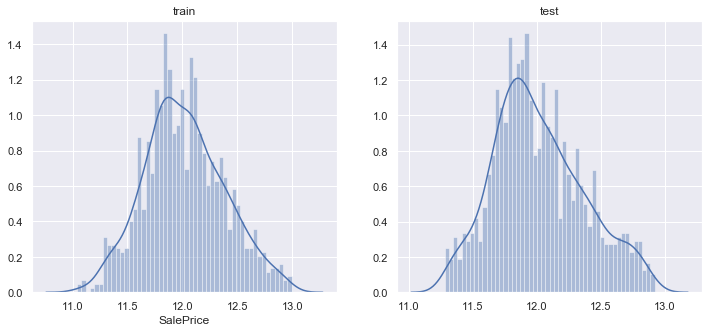

In [128]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(RF_predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [129]:
back2 = np.expm1(RF_predictions)

In [130]:
submission = pd.read_csv("sample_submission2.csv")
submission

submission["SalePrice"] = back2

print(submission.shape)
submission.head()

(1459, 2)


,Id,SalePrice
0,1461,125295.031627
1,1462,152132.823027
2,1463,175520.937238
3,1464,180917.390703
4,1465,202057.495684


In [131]:
submission.to_csv("submission2.csv".format(score), index=False)

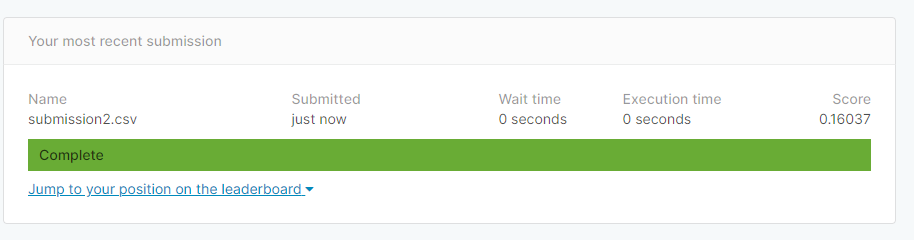

In [132]:
 Image("2nd submission.png")

# test score=0.12834, 1768 등